In [1]:
! pip install -q -U tensor-sensor

In [2]:
import tsensor
tsensor.__version__

'0.1b1'

### NumPy

In [3]:
import numpy as np

n = 200         # number of instances
d = 764         # number of instance features
n_neurons = 100 # how many neurons in this layer?

W = np.random.rand(d,n_neurons)
b = np.random.rand(n_neurons,1)
X = np.random.rand(n,d)
Y = W @ X.T + b  # compute output for one hidden-layer

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 764 is different from 100)

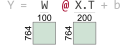

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 764 is different from 100)
Cause: @ on tensor operand W w/shape (764, 100) and operand X.T w/shape (764, 200)

In [4]:
with tsensor.clarify() as c:
    Y = W @ X.T + b

In [9]:
c.view.savefig("images/numpy-mm.svg")

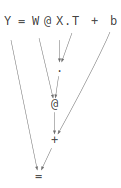

In [10]:
tsensor.astviz("Y = W @ X.T + b")

### PyTorch

In [11]:
import torch

n = 200         # number of instances
d = 764         # number of instance features
n_neurons = 100 # how many neurons in this layer?

W = torch.rand(d,n_neurons)
b = torch.rand(n_neurons,1)
X = torch.rand(n,d)
Y = W @ X.T + b  # compute output for one hidden-layer

RuntimeError: size mismatch, m1: [764 x 100], m2: [764 x 200] at /tmp/pip-req-build-as628lz5/aten/src/TH/generic/THTensorMath.cpp:41

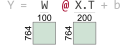

RuntimeError: size mismatch, m1: [764 x 100], m2: [764 x 200] at /tmp/pip-req-build-as628lz5/aten/src/TH/generic/THTensorMath.cpp:41
Cause: @ on tensor operand W w/shape [764, 100] and operand X.T w/shape [764, 200]

In [12]:
with tsensor.clarify() as c:
    Y = W @ X.T + b

### TensorFlow

In [14]:
import tensorflow as tf

n = 200         # number of instances
d = 764         # number of instance features
n_neurons = 100 # how many neurons in this layer?

W = tf.random.uniform((d,n_neurons))
b = tf.random.uniform((n_neurons,1))
X = tf.random.uniform((n,d))
Y = W @ tf.transpose(X) + b  # compute output for one hidden-layer

InvalidArgumentError: Matrix size-incompatible: In[0]: [764,100], In[1]: [764,200] [Op:MatMul]

In [ ]:
with tsensor.clarify():
    Y = W @ tf.transpose(X) + b

In [ ]:
tsensor.astviz("Y = W @ tf.transpose(X) + b")